## Data Cleaning

##### Reading the csv file

In [113]:
import pandas as pd

# Reading a csv file
cities=pd.read_csv('cities_5.csv')
cities.head()

,id,name,month,average,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,2402,SAN BORJA,2018-02-01,54.548000,pm10,1,PM10,µg/m³,2018-02-19T17:00:00Z,2018-02-23T06:00:00Z
1,2402,SAN BORJA,2018-03-01,43.410441,pm10,1,PM10,µg/m³,2018-03-01T07:00:00Z,2018-03-14T07:00:00Z
2,2402,SAN BORJA,2018-04-01,64.367201,pm10,1,PM10,µg/m³,2018-04-11T17:00:00Z,2018-05-01T00:00:00Z
3,2402,SAN BORJA,2018-05-01,69.778412,pm10,1,PM10,µg/m³,2018-05-01T01:00:00Z,2018-06-01T00:00:00Z
4,2402,SAN BORJA,2018-06-01,32.979294,pm10,1,PM10,µg/m³,2018-06-01T01:00:00Z,2018-07-01T00:00:00Z


##### Rounding the average values of the parameter 

In [114]:
# Round the average column
cities['average'] = cities['average'].round()

# Print the DataFrame to verify
cities.head()

,id,name,month,average,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³,2018-02-19T17:00:00Z,2018-02-23T06:00:00Z
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³,2018-03-01T07:00:00Z,2018-03-14T07:00:00Z
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³,2018-04-11T17:00:00Z,2018-05-01T00:00:00Z
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³,2018-05-01T01:00:00Z,2018-06-01T00:00:00Z
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³,2018-06-01T01:00:00Z,2018-07-01T00:00:00Z


##### Here we are dropping the columns that we don't need for the analysis

In [115]:
# Dropping unnecessary columns
cities=cities.drop(['first_datetime', 'last_datetime'], axis=1)
# Checking the first few rows
cities.head()

,id,name,month,average,parameter,parameterId,displayName,unit
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³


##### Checking for duplicate values

In [116]:
# Check for duplicated rows
duplicates = cities[cities.duplicated(keep=False)]

# Display the duplicated rows
print(duplicates)

Empty DataFrame
Columns: [id, name, month, average, parameter, parameterId, displayName, unit]
Index: []


##### Modifying the months column

In [117]:
# Creating a dataframe
cities = pd.DataFrame(cities)

# Convert the 'month' column to datetime
cities['month']=pd.to_datetime(cities['month'])

# Apply strftime to the 'month' column to format it as "Month Year"
cities['formatted_month'] = cities['month'].dt.strftime('%B %Y')

# Checking on few rows
cities.head()

,id,name,month,average,parameter,parameterId,displayName,unit,formatted_month
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³,February 2018
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³,March 2018
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³,April 2018
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³,May 2018
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³,June 2018


In [118]:
# Removing the previous 'month' column
cities=cities.drop('month',axis=1)
cities.head()
  

,id,name,average,parameter,parameterId,displayName,unit,formatted_month
0,2402,SAN BORJA,55.0,pm10,1,PM10,µg/m³,February 2018
1,2402,SAN BORJA,43.0,pm10,1,PM10,µg/m³,March 2018
2,2402,SAN BORJA,64.0,pm10,1,PM10,µg/m³,April 2018
3,2402,SAN BORJA,70.0,pm10,1,PM10,µg/m³,May 2018
4,2402,SAN BORJA,33.0,pm10,1,PM10,µg/m³,June 2018


#### Modifying the columns

In [119]:
# Splitting the formatted_month column to month and year
cities[['months','year']] = cities['formatted_month'].str.split(' ',expand=True)
cities 

# Removing the formatted_month column
cities = cities.drop('formatted_month',axis=1)
cities.head()

# Export the DataFrame to a CSV file
csv_file_path = 'cities_modified.csv'
cities.to_csv(csv_file_path, index=False)

#### Claud

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assess data completeness
completeness = cities.groupby(['name', 'parameter'])['average'].count().unstack()
print("Data completeness (number of measurements):")
print(completeness)

# Calculate the percentage of missing data for each city-parameter combination
missing_percentage = (1 - completeness.divide(completeness.max())) * 100
print("\nPercentage of missing data:")
print(missing_percentage)

# Step 2: Filter out parameters or cities with too much missing data
threshold = 50
valid_parameters = missing_percentage.columns[missing_percentage.mean() < threshold]
valid_cities = missing_percentage.index[missing_percentage.mean(axis=1) < threshold]

# Filter the original dataset
cities_filtered = cities[
    (cities['name'].isin(valid_cities)) & 
    (cities['parameter'].isin(valid_parameters))
]

# Step 3: Handle remaining missing values
cities_pivoted = cities_filtered.pivot_table(
    index=['name', 'months', 'year'],
    columns='parameter',
    values='average'
).reset_index()

cities_cleaned = cities_pivoted.groupby('name').apply(
    lambda x: x.sort_values(['year', 'months']).ffill()
).reset_index(drop=True)

# Convert 'months' to datetime for proper sorting
cities_cleaned['date'] = pd.to_datetime(cities_cleaned['year'].astype(str) + ' ' + cities_cleaned['months'], format='%Y %B')
cities_cleaned = cities_cleaned.sort_values(['name', 'date'])

print("\nCleaned data shape:", cities_cleaned.shape)
print(cities_cleaned.head())

# Get the list of parameters
parameters = cities_cleaned.columns.drop(['name', 'months', 'year', 'date'])

# Export the resulting DataFrame to a CSV file
cities_cleaned.to_csv('cleaned_cities_data.csv', index=False)

Data completeness (number of measurements):
parameter                 co   no2    o3  pm10  pm25   so2
name                                                      
42N035 - AARSCHOT        NaN  79.0  79.0  79.0  79.0   NaN
Augsburg/Bourges-Platz   NaN  78.0  78.0  78.0  78.0   NaN
CUENCA                   NaN  78.0  78.0   NaN   NaN  78.0
SAN BORJA               44.0  55.0  55.0  51.0  51.0  51.0

Percentage of missing data:
parameter                co        no2         o3       pm10       pm25  \
name                                                                      
42N035 - AARSCHOT       NaN   0.000000   0.000000   0.000000   0.000000   
Augsburg/Bourges-Platz  NaN   1.265823   1.265823   1.265823   1.265823   
CUENCA                  NaN   1.265823   1.265823        NaN        NaN   
SAN BORJA               0.0  30.379747  30.379747  35.443038  35.443038   

parameter                     so2  
name                               
42N035 - AARSCHOT             NaN  
Augsburg/Bourg

C:\Users\admin\AppData\Local\Temp\ipykernel_25324\2278818862.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cities_cleaned = cities_pivoted.groupby('name').apply(


In [131]:
# Drop specified columns
new= pd.read_csv('cleaned_cities_data.csv')
new.drop(columns=['co', 'so2'], inplace=True, errors='ignore')

# Drop rows where 'name' is 'CUNECA'
new = new[new['name'] != 'CUENCA']

# Export the resulting DataFrame to a CSV file
new.to_csv('final_new.csv', index=False)

In [132]:
import pandas as pd

# Load the cleaned data
fnew = pd.read_csv('final_new.csv')

# Get the list of parameters excluding 'name', 'months', 'year', 'date'
parameters = fnew.columns.drop(['name', 'months', 'year', 'date'])

# Summary Statistics
summary_stats = fnew.groupby('name')[parameters].agg(['mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats)

# Comparative Analysis
avg_aqi = fnew.groupby('name')[parameters].mean().sort_values(parameters[0], ascending=False)
print("\nCities ranked by average AQI (using first parameter):")
print(avg_aqi)

# Best and worst air quality
best_cities = avg_aqi.head(5)
worst_cities = avg_aqi.tail(5)
print("\nTop 5 cities with best air quality:")
print(best_cities)
print("\nTop 5 cities with worst air quality:")
print(worst_cities)

# Export to Excel
with pd.ExcelWriter('aqi_analysis.xlsx') as writer:
    summary_stats.to_excel(writer, sheet_name='Summary Statistics')
    avg_aqi.to_excel(writer, sheet_name='City Rankings')
    best_cities.to_excel(writer, sheet_name='Best Air Quality')
    worst_cities.to_excel(writer, sheet_name='Worst Air Quality')

print("\nData exported to 'aqi_analysis.xlsx'")


Summary Statistics:
                              no2                                      o3  \
                             mean median        std  min   max       mean   
name                                                                        
42N035 - AARSCHOT       11.468354   10.0   4.790042  1.0  28.0  47.936709   
Augsburg/Bourges-Platz  19.487179   19.0   5.658561  6.0  39.0  38.115385   
SAN BORJA               14.000000   14.5  11.012390  0.0  45.0   6.625000   

                                                          pm10         \
                       median        std  min   max       mean median   
name                                                                    
42N035 - AARSCHOT        50.0  15.570635  2.0  91.0  18.936709   18.0   
Augsburg/Bourges-Platz   39.5  16.772721  7.0  88.0  14.987179   14.5   
SAN BORJA                 6.0   7.087922  0.0  22.0  66.196429   55.0   

                                                    pm25                   \
 

In [135]:
import pandas as pd
from scipy import stats


# Yearly trends
yearly_avg = fnew.groupby(['name', 'year'])[parameters].mean().reset_index()
print("Yearly trends:")
print(yearly_avg)

# Seasonal patterns
seasonal_avg = fnew.groupby(['name', 'months'])[parameters].mean().reset_index()
print("\nSeasonal patterns:")
print(seasonal_avg)

# Convert 'date' to datetime if it's not already
fnew['date'] = pd.to_datetime(fnew['date'])

# Long-term trends (linear regression)
long_term_trends = {}
for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    city_data['date_ordinal'] = city_data['date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal
    for param in parameters:
        slope, intercept, r_value, p_value, std_err = stats.linregress(city_data['date_ordinal'], city_data[param])
        long_term_trends[(city, param)] = {
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value,
            'p_value': p_value
        }

long_term_trends_df = pd.DataFrame(long_term_trends).T
print("\nLong-term trends:")
print(long_term_trends_df)

# Export to Excel
with pd.ExcelWriter('aqi_trends.xlsx') as writer:
    yearly_avg.to_excel(writer, sheet_name='Yearly Trends', index=False)
    seasonal_avg.to_excel(writer, sheet_name='Seasonal Patterns', index=False)
    long_term_trends_df.to_excel(writer, sheet_name='Long-term Trends')


Yearly trends:
                      name  year        no2         o3       pm10       pm25
0        42N035 - AARSCHOT  2018  16.000000  46.833333  22.833333  12.833333
1        42N035 - AARSCHOT  2019  10.750000  30.916667  16.750000  10.000000
2        42N035 - AARSCHOT  2020  11.750000  48.750000  18.916667  10.916667
3        42N035 - AARSCHOT  2021  11.750000  44.083333  20.583333  13.166667
4        42N035 - AARSCHOT  2022  10.666667  50.500000  18.000000  10.583333
5        42N035 - AARSCHOT  2023   9.583333  59.666667  18.333333  10.666667
6        42N035 - AARSCHOT  2024   8.571429  59.714286  15.857143   8.571429
7   Augsburg/Bourges-Platz  2018  23.916667  35.000000  18.583333  13.833333
8   Augsburg/Bourges-Platz  2019  18.166667  27.916667  14.500000   9.583333
9   Augsburg/Bourges-Platz  2020  20.916667  34.833333  15.500000  11.500000
10  Augsburg/Bourges-Platz  2021  19.333333  34.500000  13.500000  10.583333
11  Augsburg/Bourges-Platz  2022  18.916667  37.250000  15.25

C:\Users\admin\AppData\Local\Temp\ipykernel_25324\1493460715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['date_ordinal'] = city_data['date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal
C:\Users\admin\AppData\Local\Temp\ipykernel_25324\1493460715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['date_ordinal'] = city_data['date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal
C:\Users\admin\AppData\Local\Temp\ipykernel_25324\1493460715.py:23: SettingWithCop

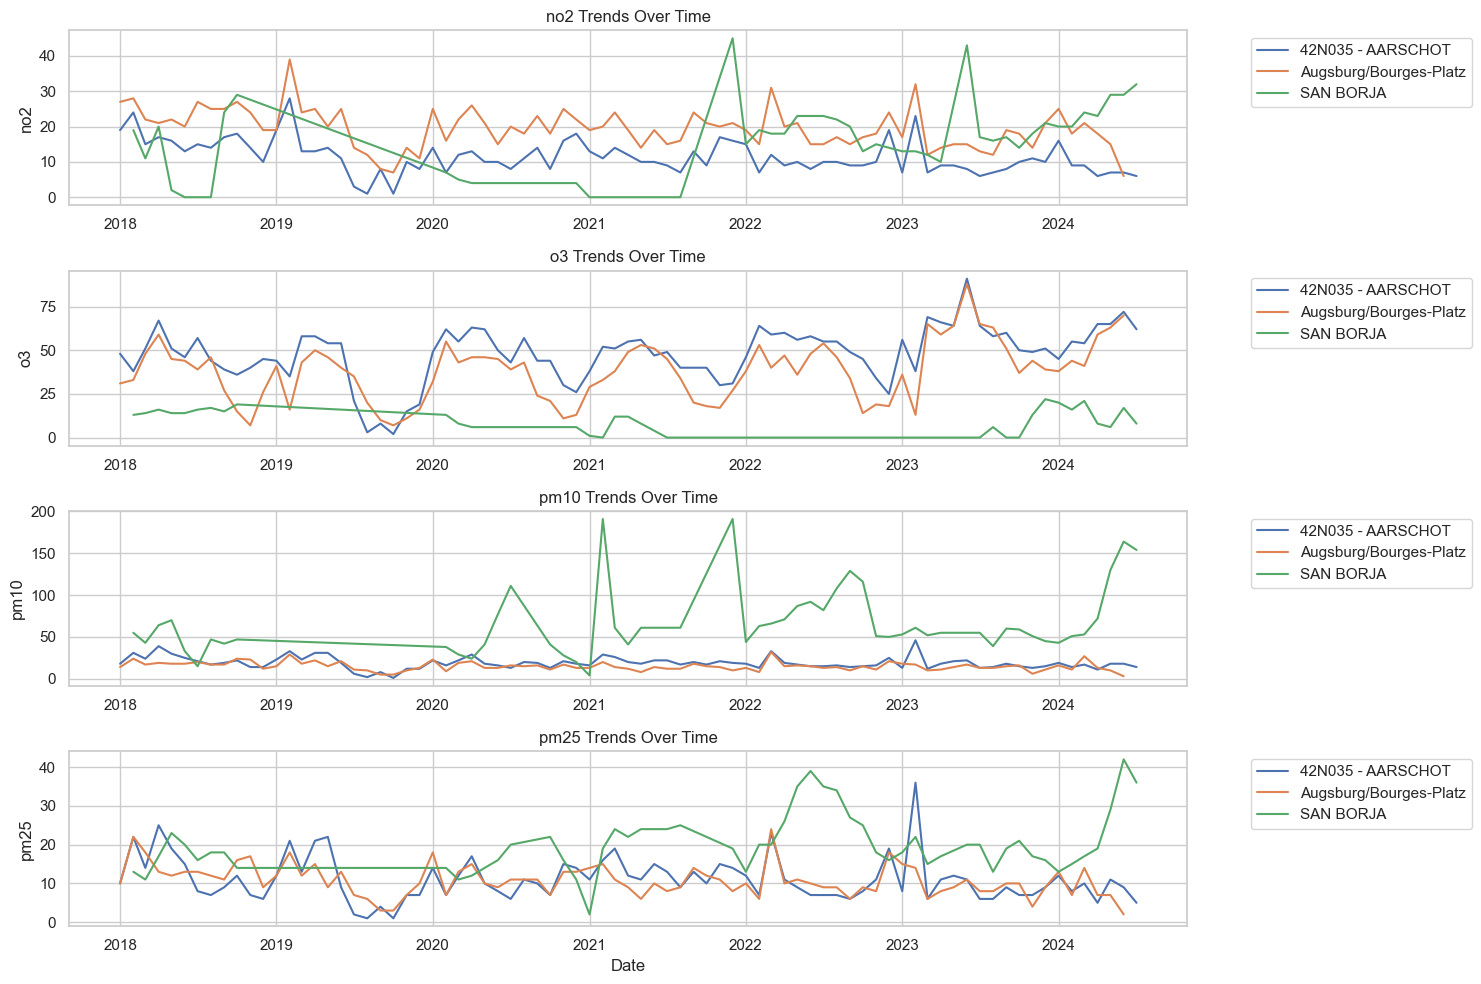

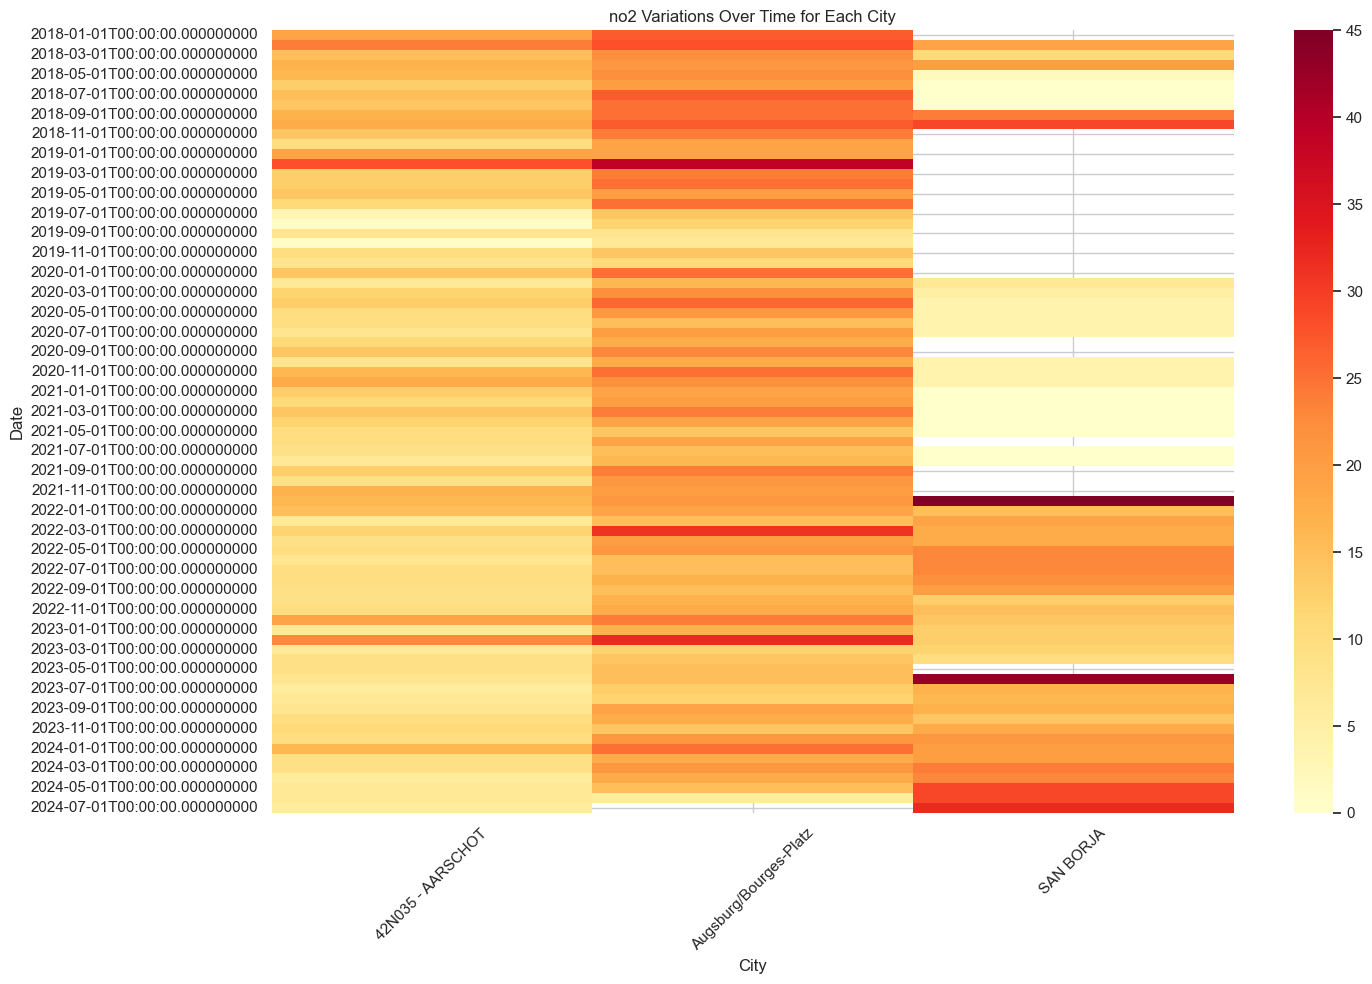

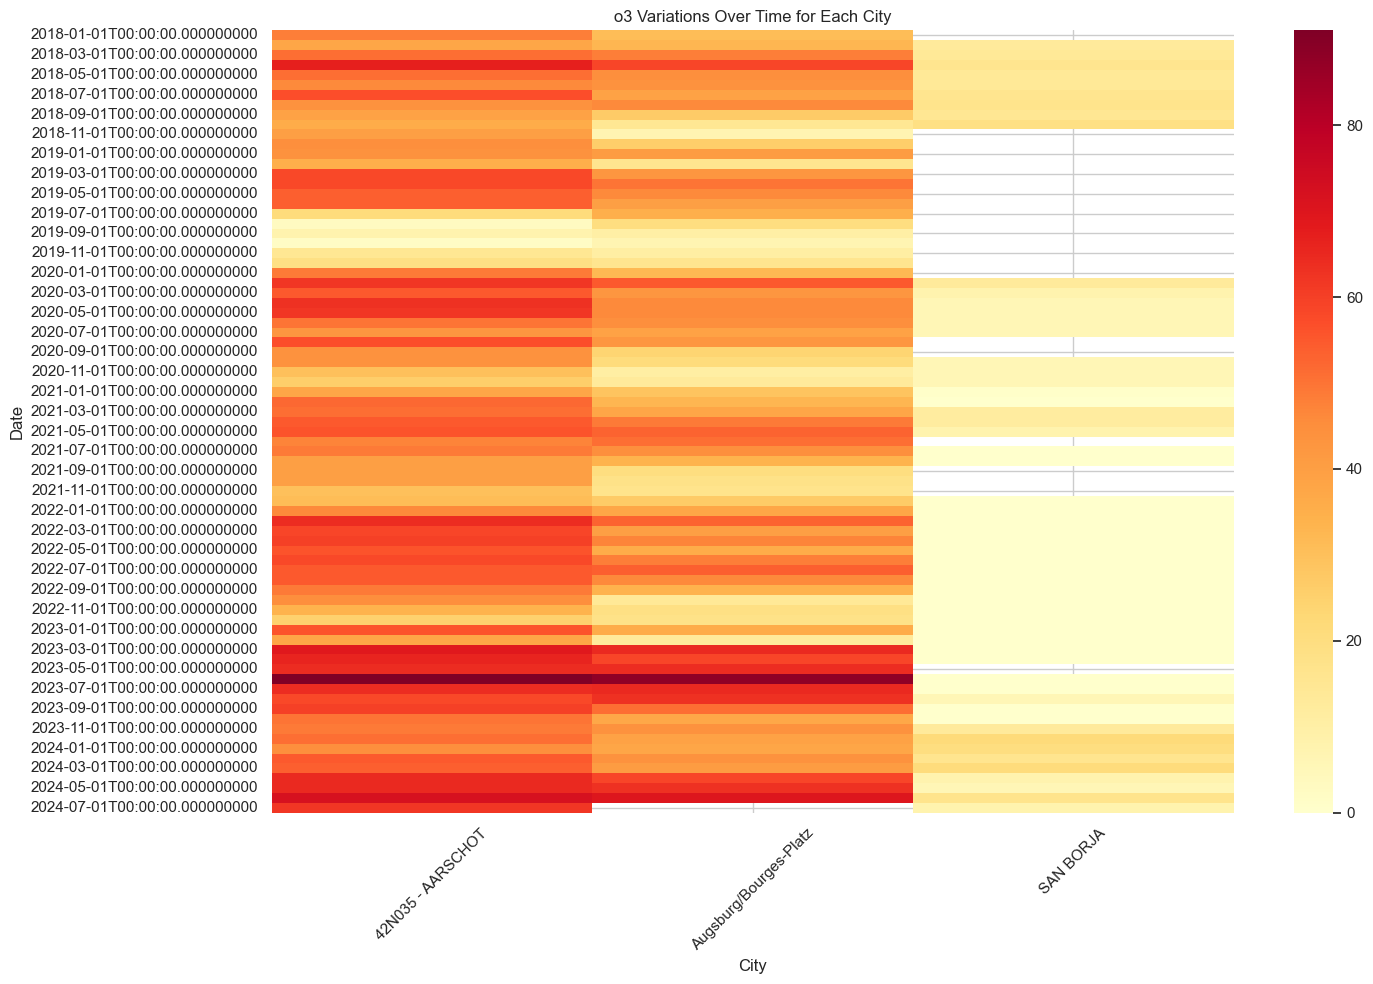

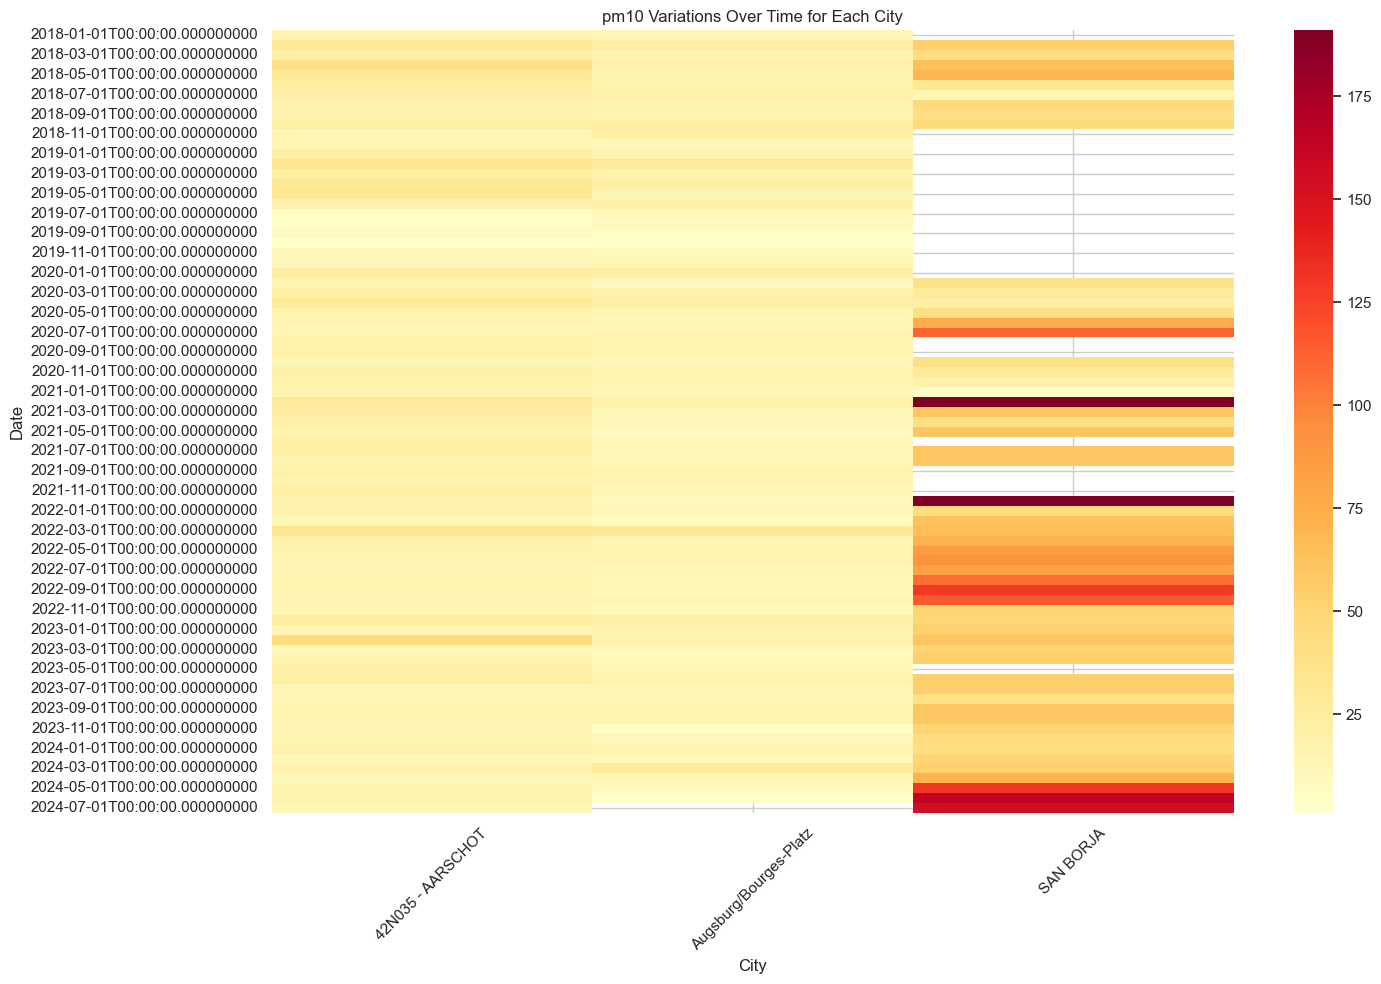

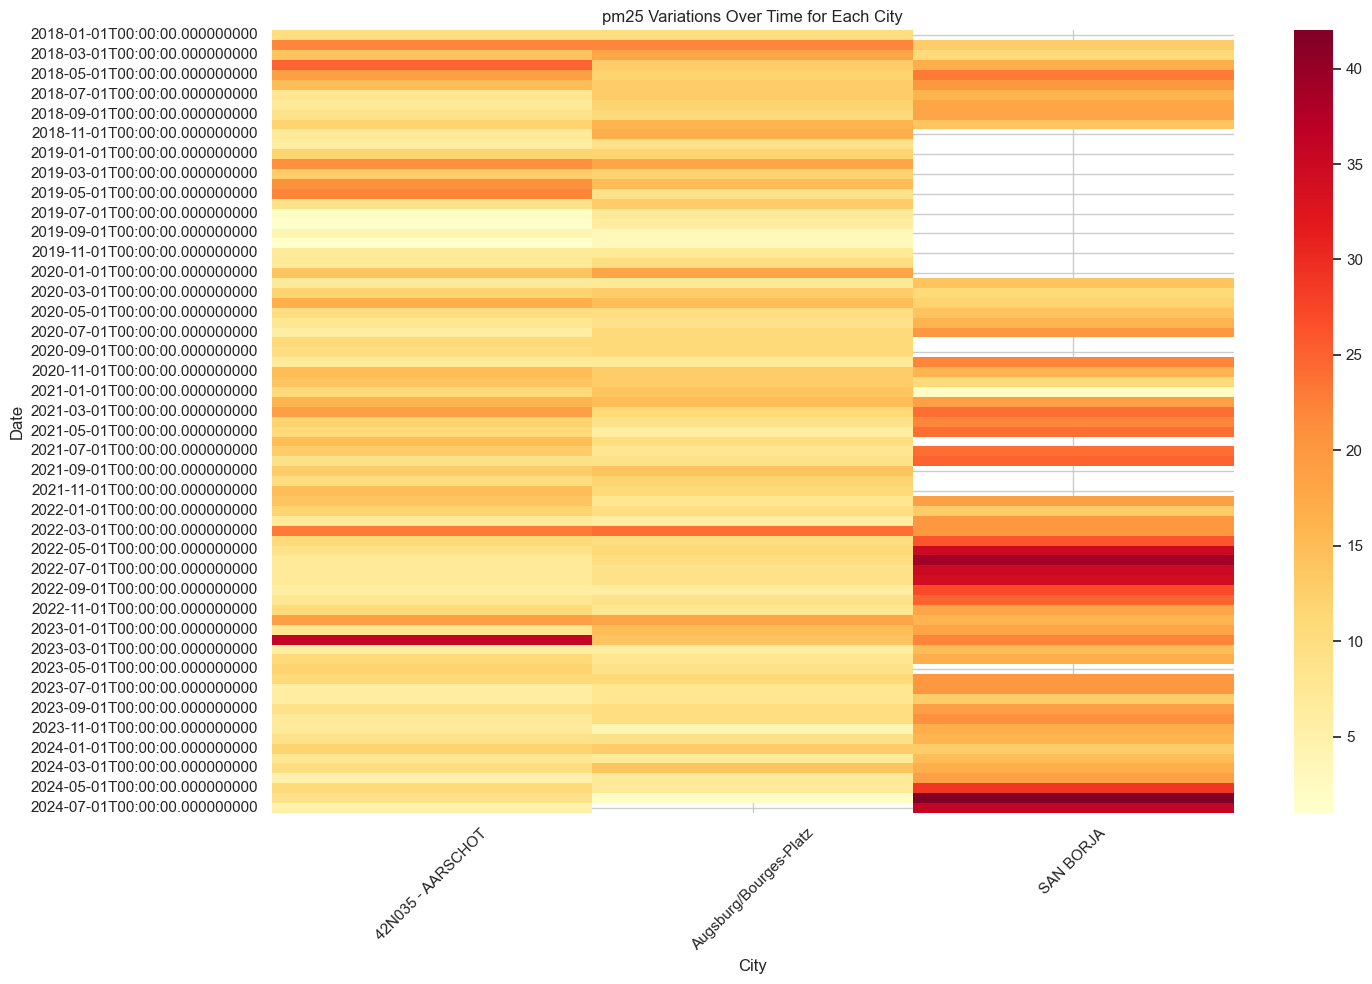

In [143]:
# Time series plots
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, 1):
    plt.subplot(len(parameters), 1, i)
    for city in fnew['name'].unique():
        city_data = fnew[fnew['name'] == city]
        plt.plot(city_data['date'], city_data[param], label=city)
    plt.ylabel(param)
    if i == len(parameters):
        plt.xlabel('Date')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{param} Trends Over Time')
plt.tight_layout()
plt.show()

# Heatmaps
for param in parameters:
    plt.figure(figsize=(15, 10))
    pivot_data = fnew.pivot(index='date', columns='name', values=param)
    sns.heatmap(pivot_data, cmap='YlOrRd', annot=False)
    plt.title(f'{param} Variations Over Time for Each City')
    plt.xlabel('City')
    plt.ylabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


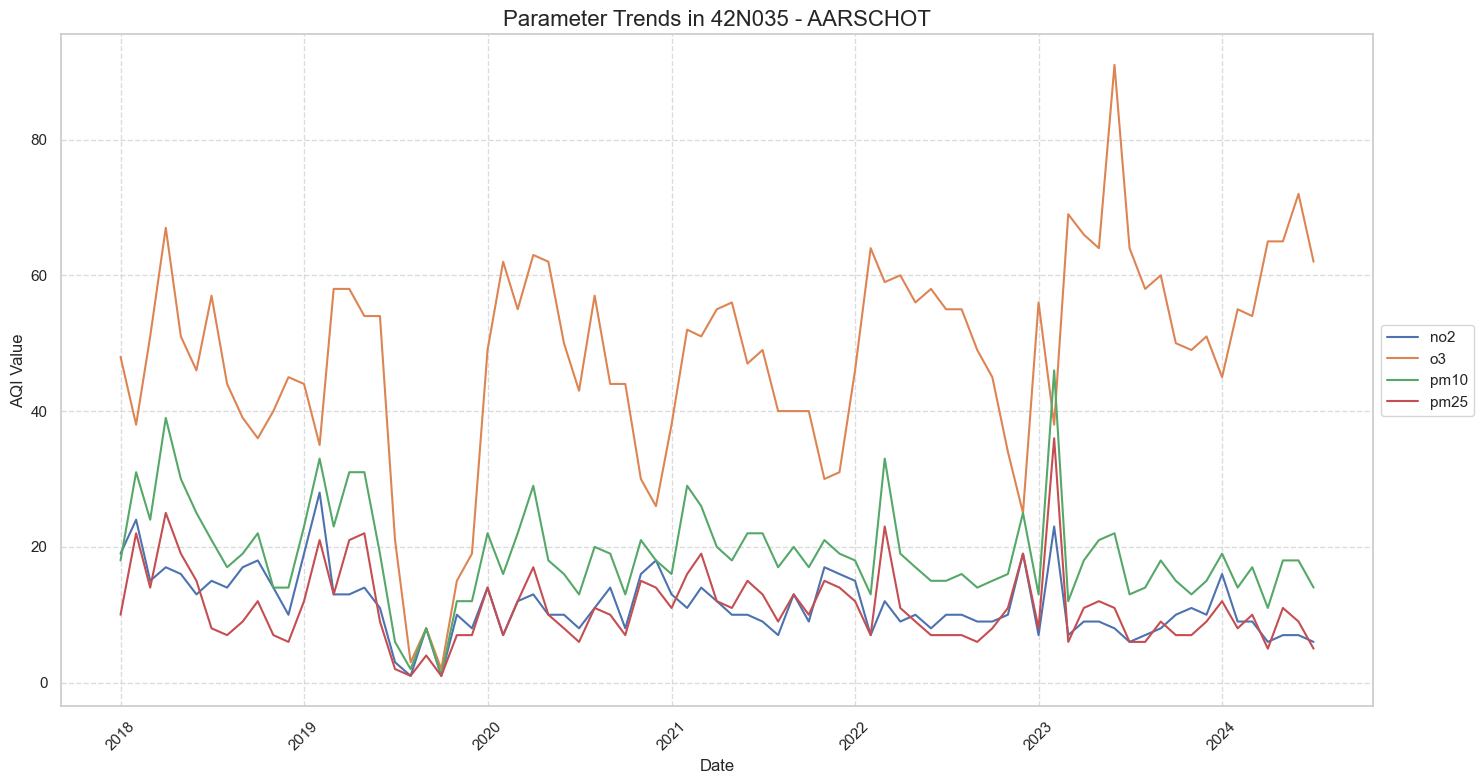

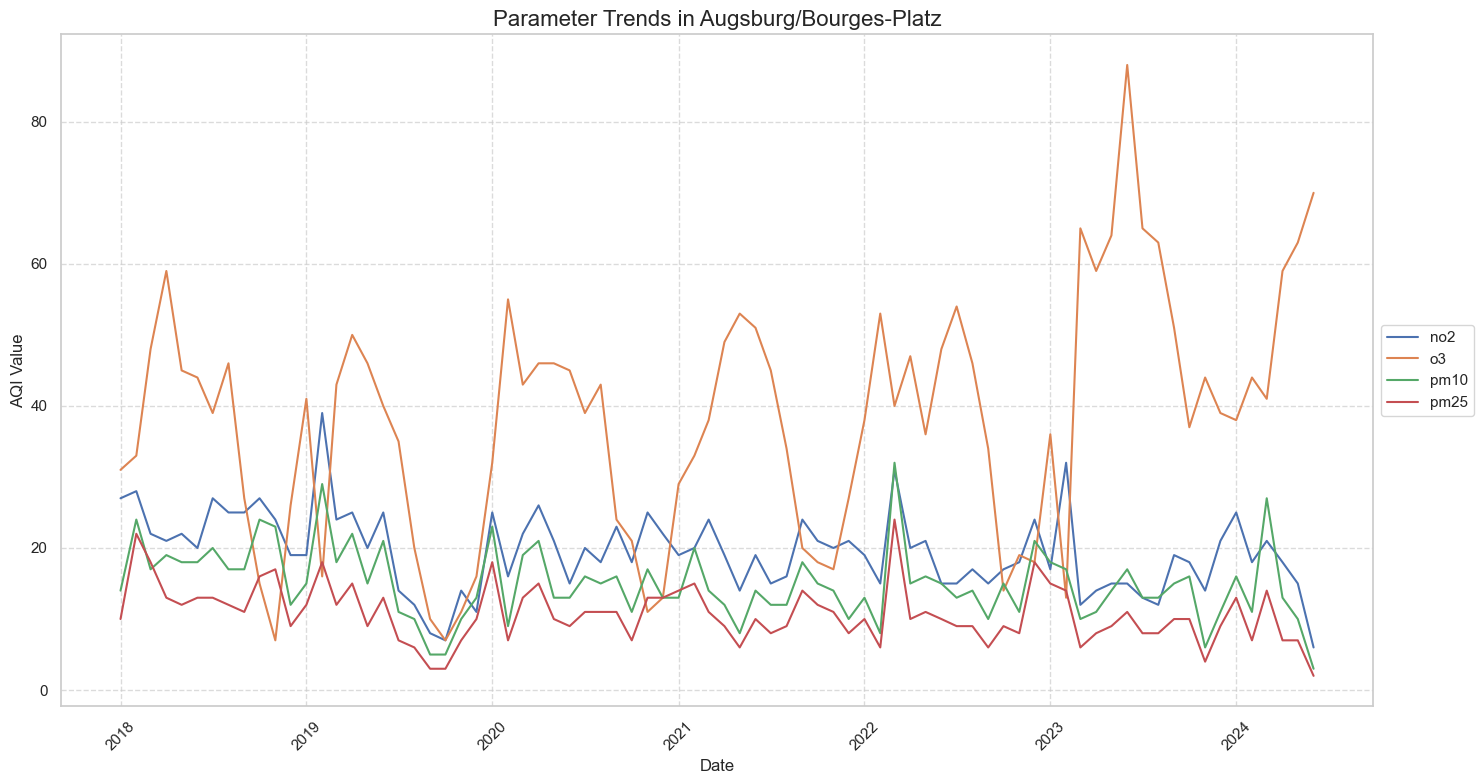

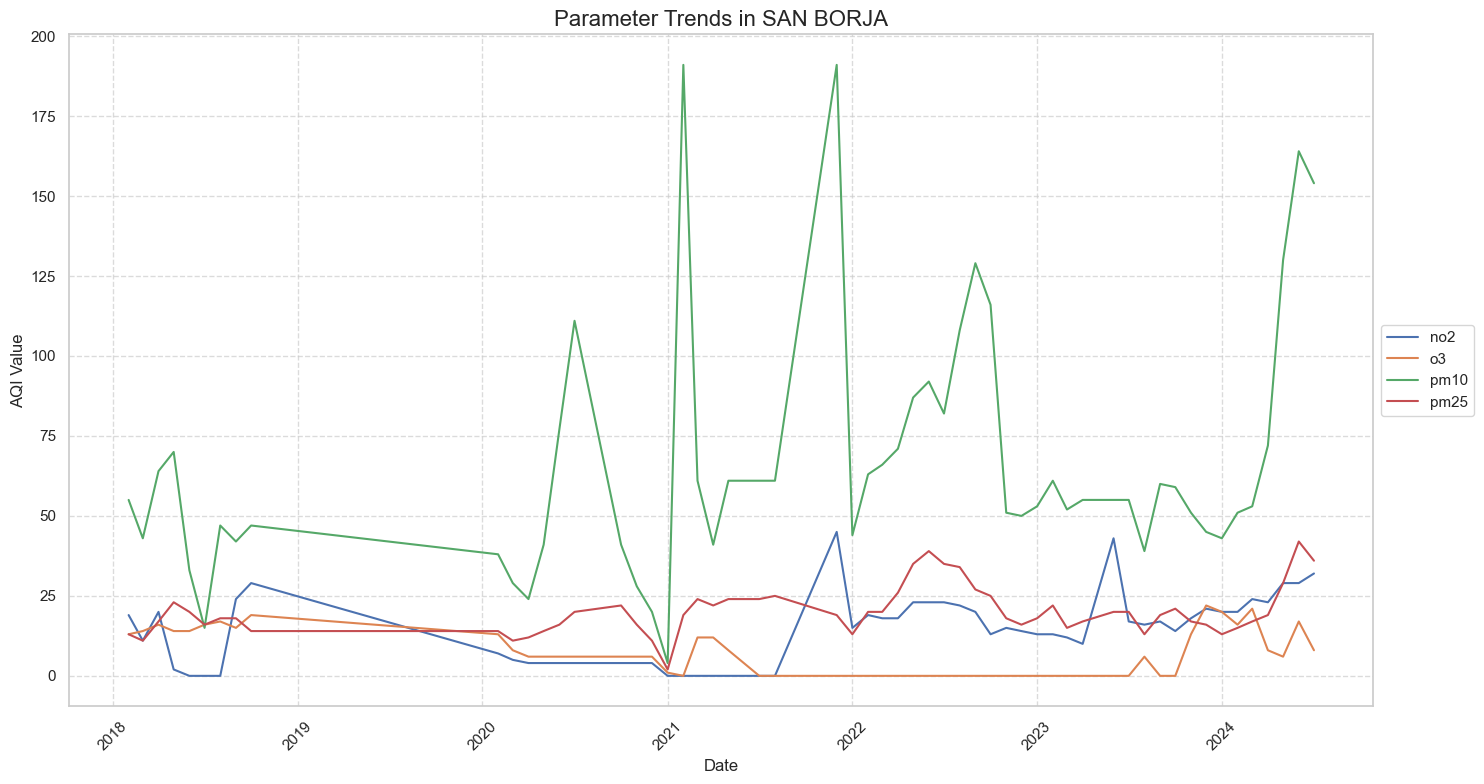

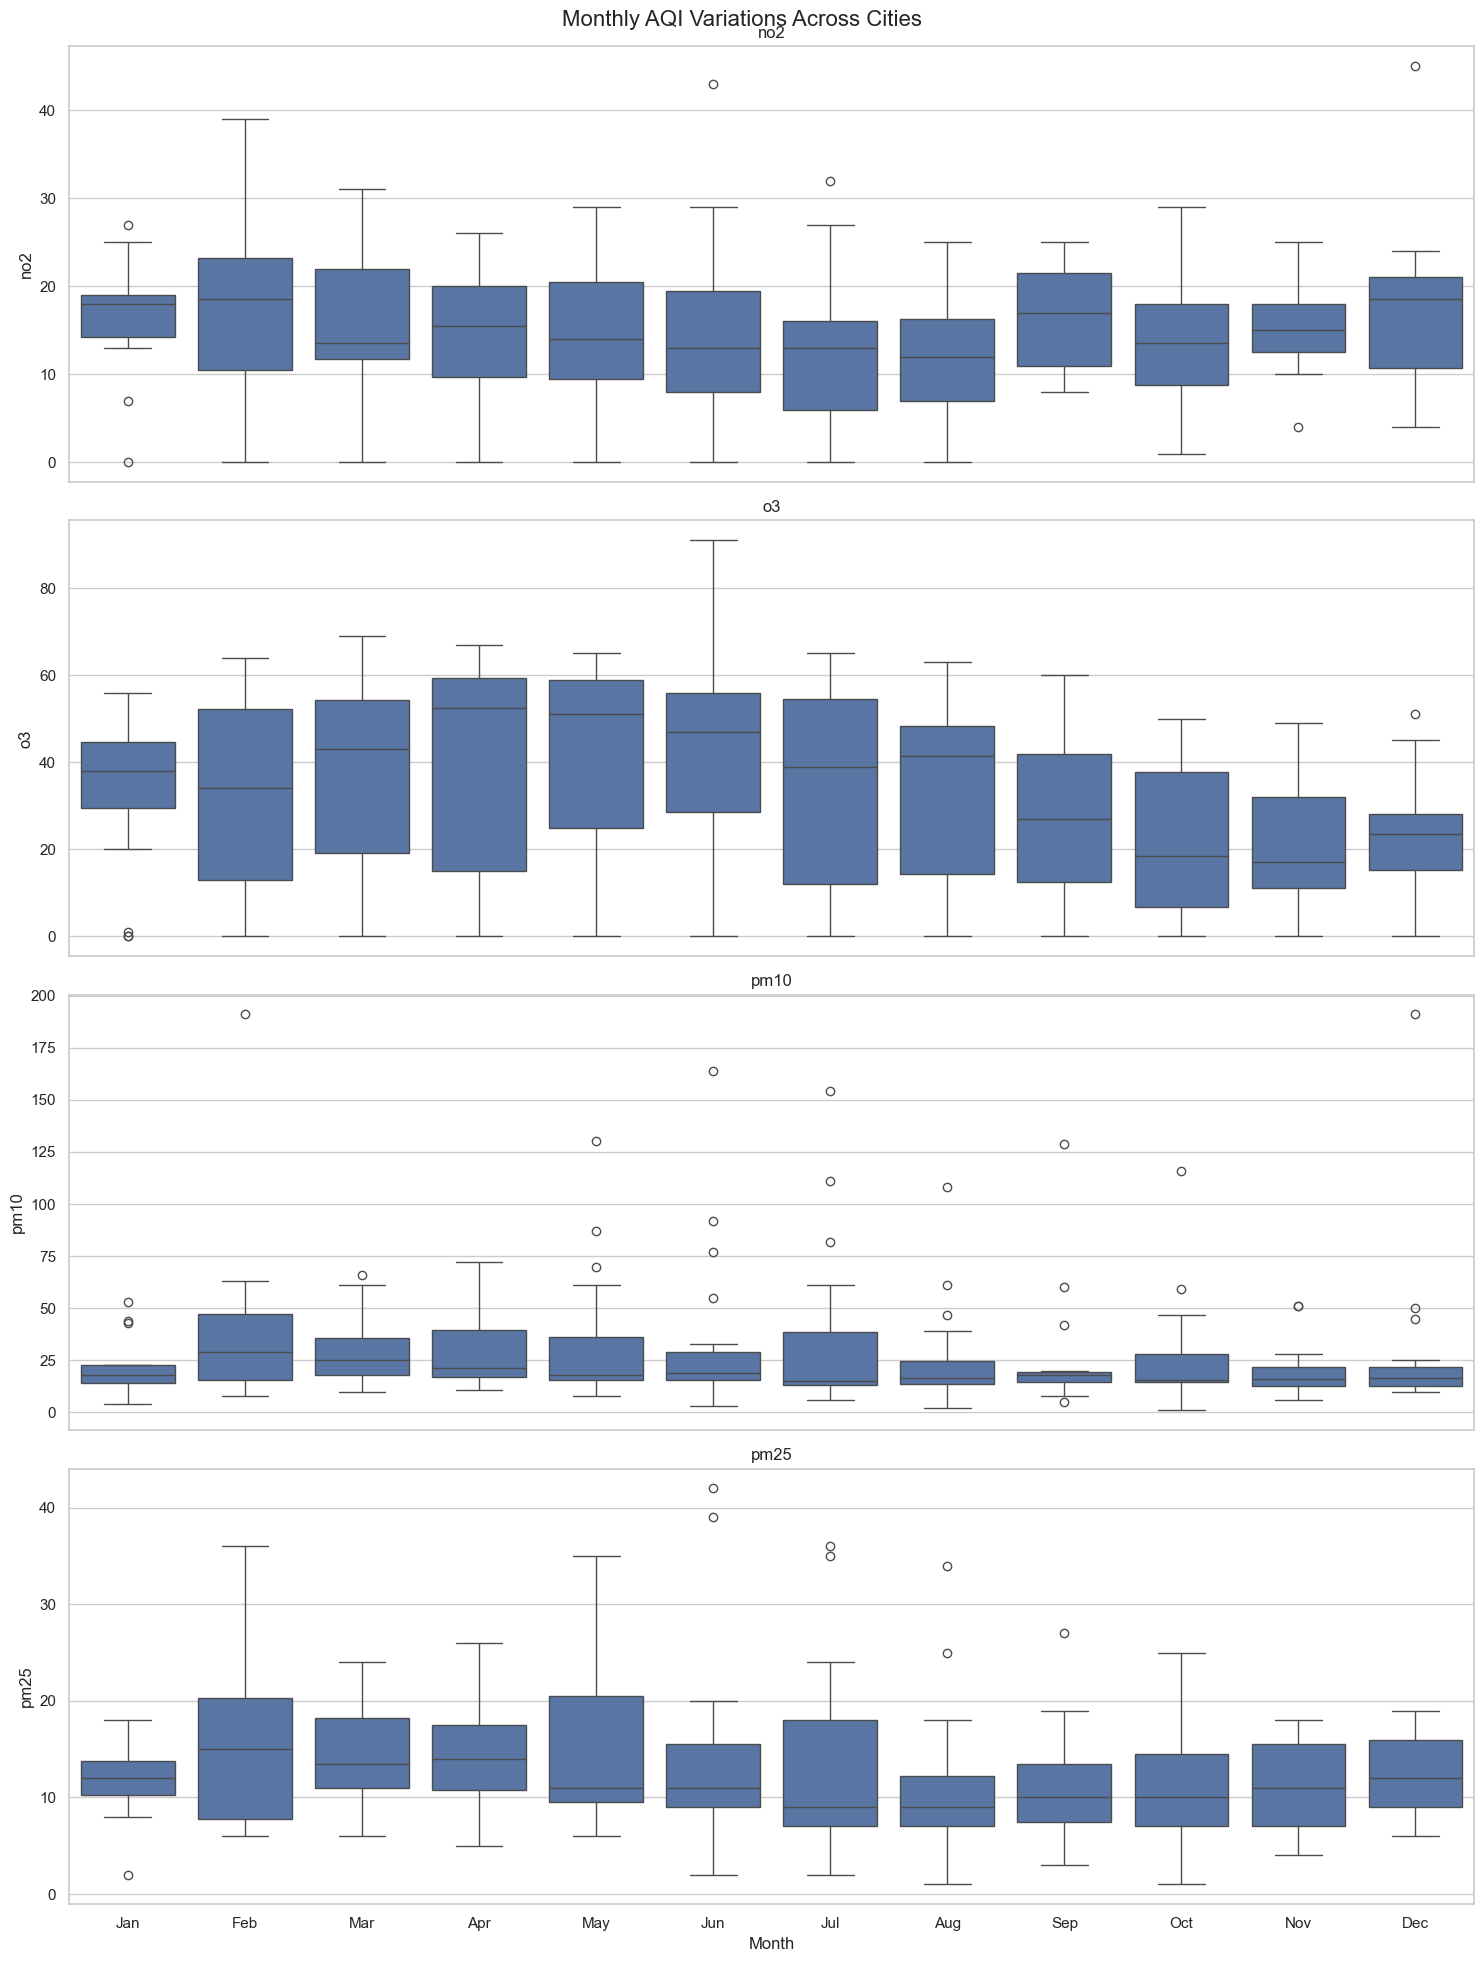

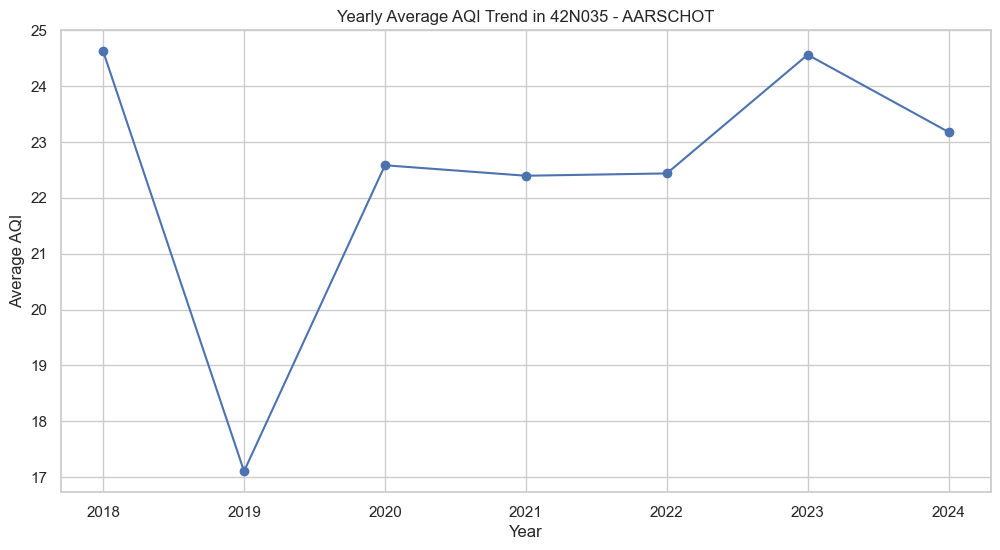

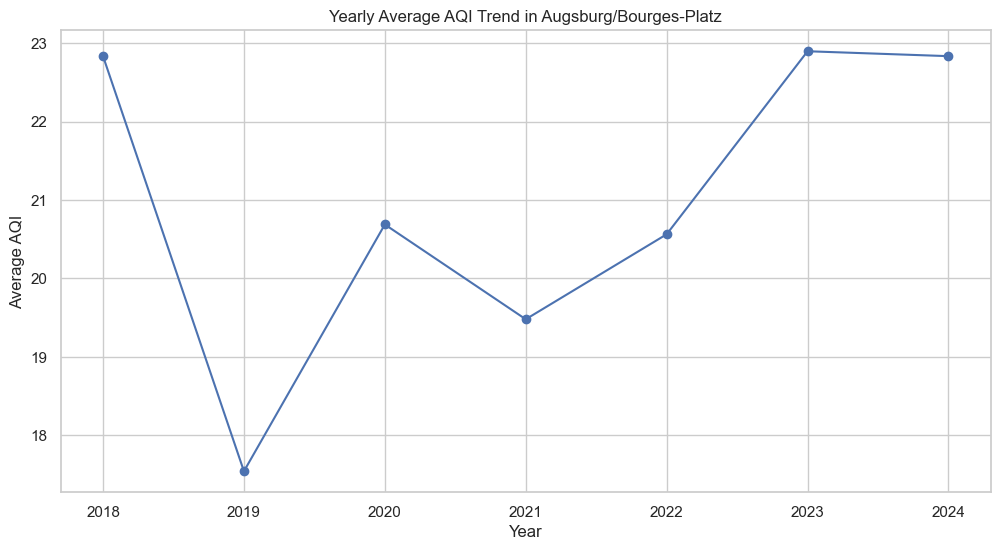

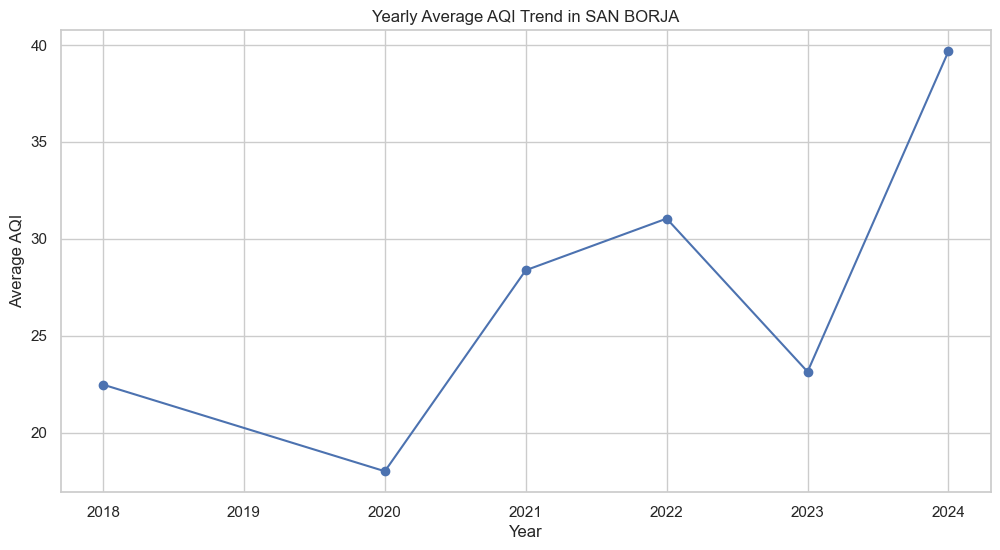

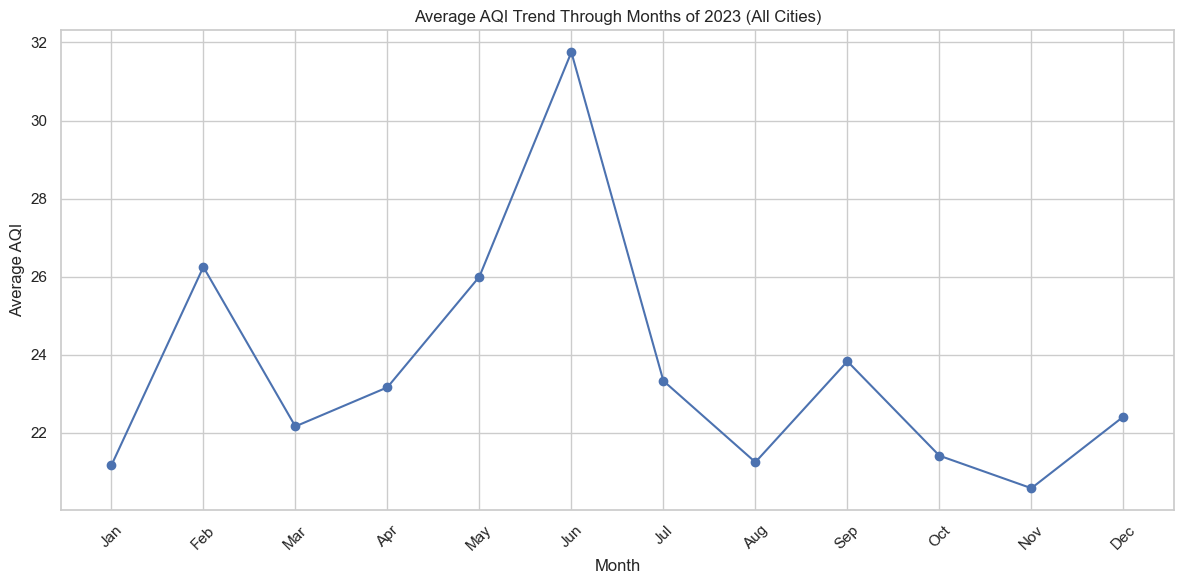

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'fnew' is your DataFrame and 'parameters' is your list of AQI parameters

# Comparison of parameter trends within each city using a single plot
for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    
    plt.figure(figsize=(15, 8))
    for param in parameters:
        plt.plot(city_data['date'], city_data[param], label=param)
    
    plt.title(f'Parameter Trends in {city}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('AQI Value')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 2. Box plot for monthly variations across cities
fnew['month'] = fnew['date'].dt.strftime('%b')  # Convert to Jan, Feb, etc. format
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(len(parameters), 1, figsize=(15, 5*len(parameters)), sharex=True)
fig.suptitle('Monthly AQI Variations Across Cities', fontsize=16)

for i, param in enumerate(parameters):
    sns.boxplot(x='month', y=param, data=fnew, ax=axes[i], order=month_order)
    axes[i].set_title(param)
    axes[i].set_xlabel('')

axes[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

# 3. Line plots for each city showing the trend of average AQI through years
fnew['year'] = fnew['date'].dt.year
fnew['avg_aqi'] = fnew[parameters].mean(axis=1)

for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    yearly_avg = city_data.groupby('year')['avg_aqi'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_avg['year'], yearly_avg['avg_aqi'], marker='o')
    plt.title(f'Yearly Average AQI Trend in {city}')
    plt.xlabel('Year')
    plt.ylabel('Average AQI')
    plt.grid(True)
    plt.show()

# 4. Line graph showing the trend of average AQI through months of 2023
data_2023 = fnew[fnew['date'].dt.year == 2023]
monthly_avg_2023 = data_2023.groupby('month')[parameters].mean().reindex(month_order)
overall_avg_2023 = monthly_avg_2023.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(month_order, overall_avg_2023, marker='o')
plt.title('Average AQI Trend Through Months of 2023 (All Cities)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

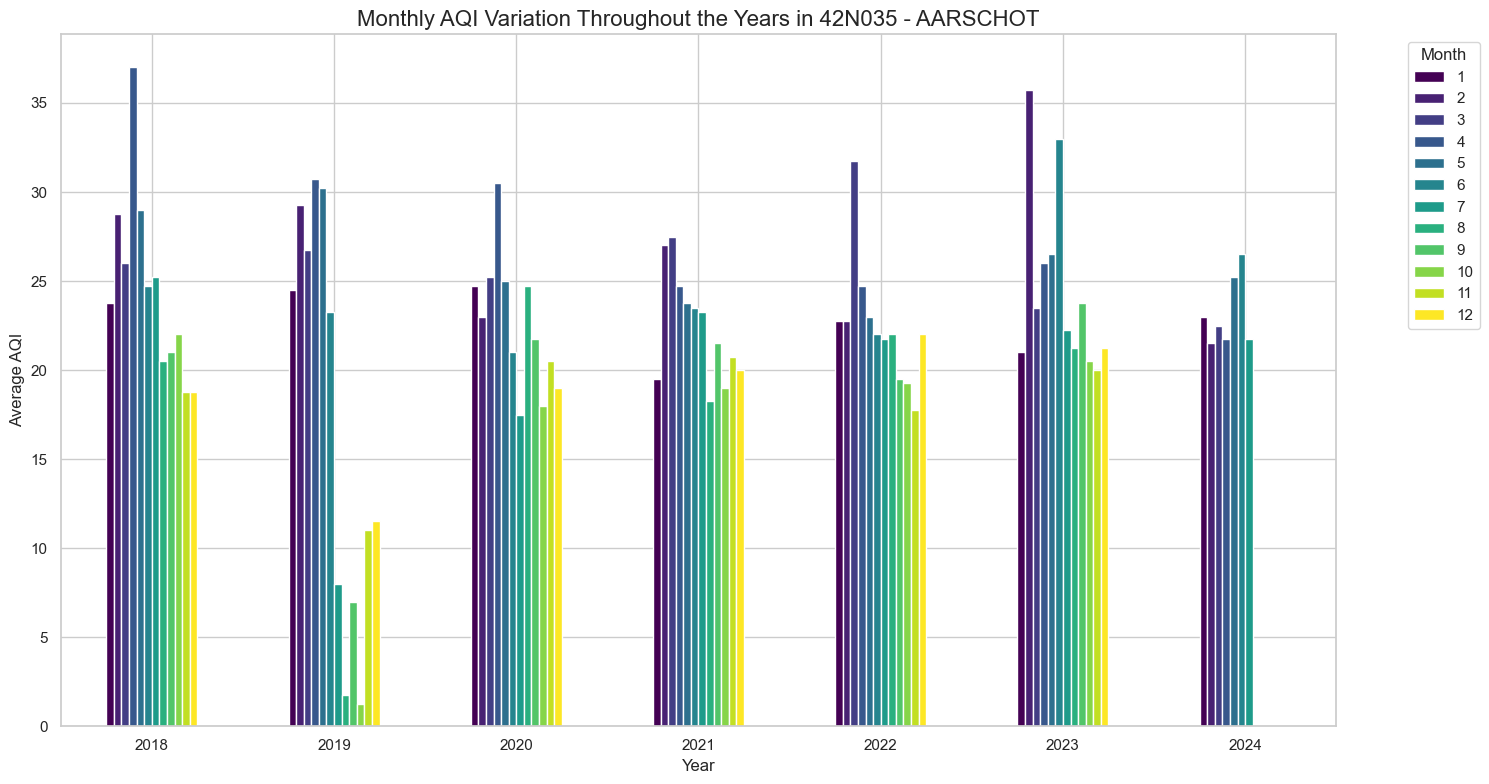

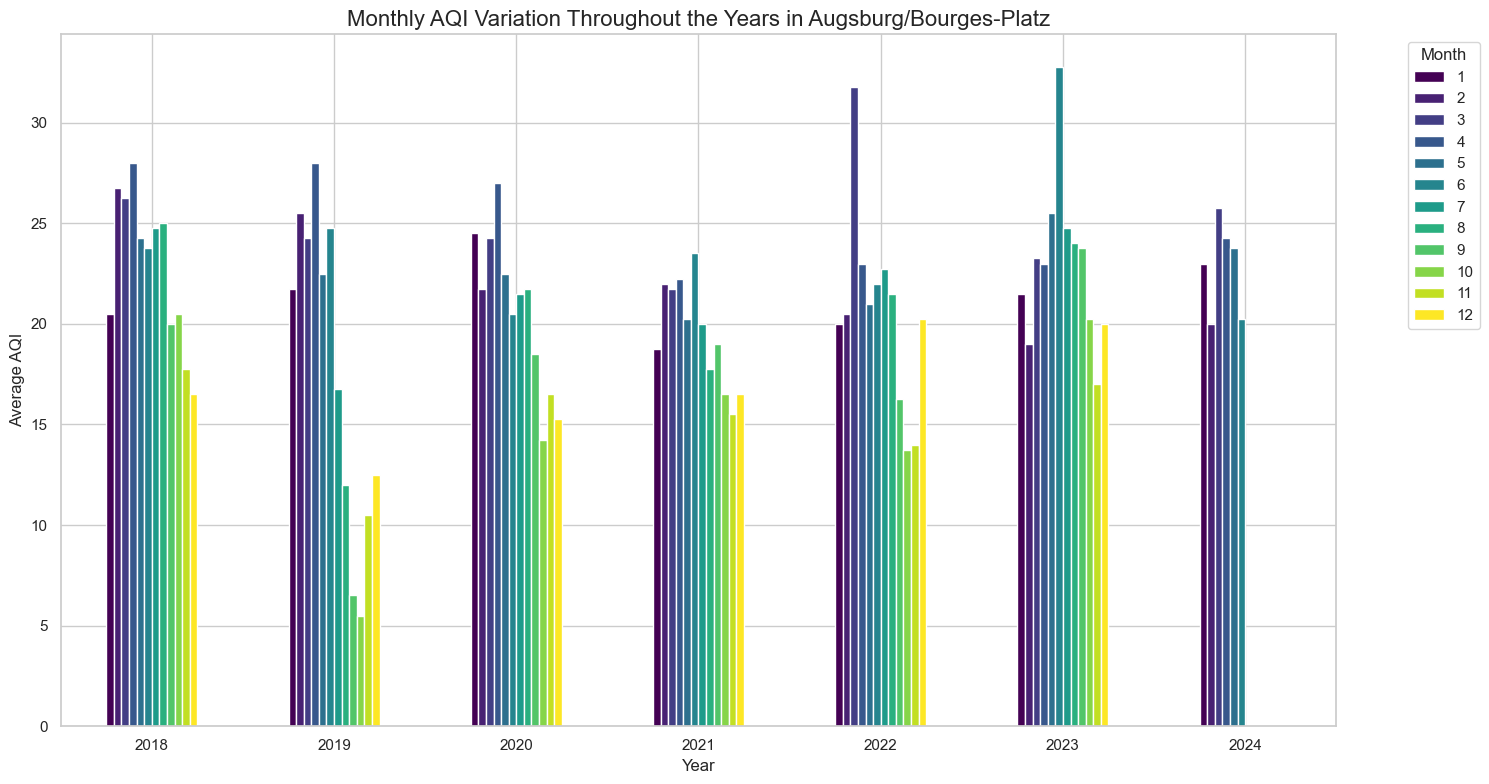

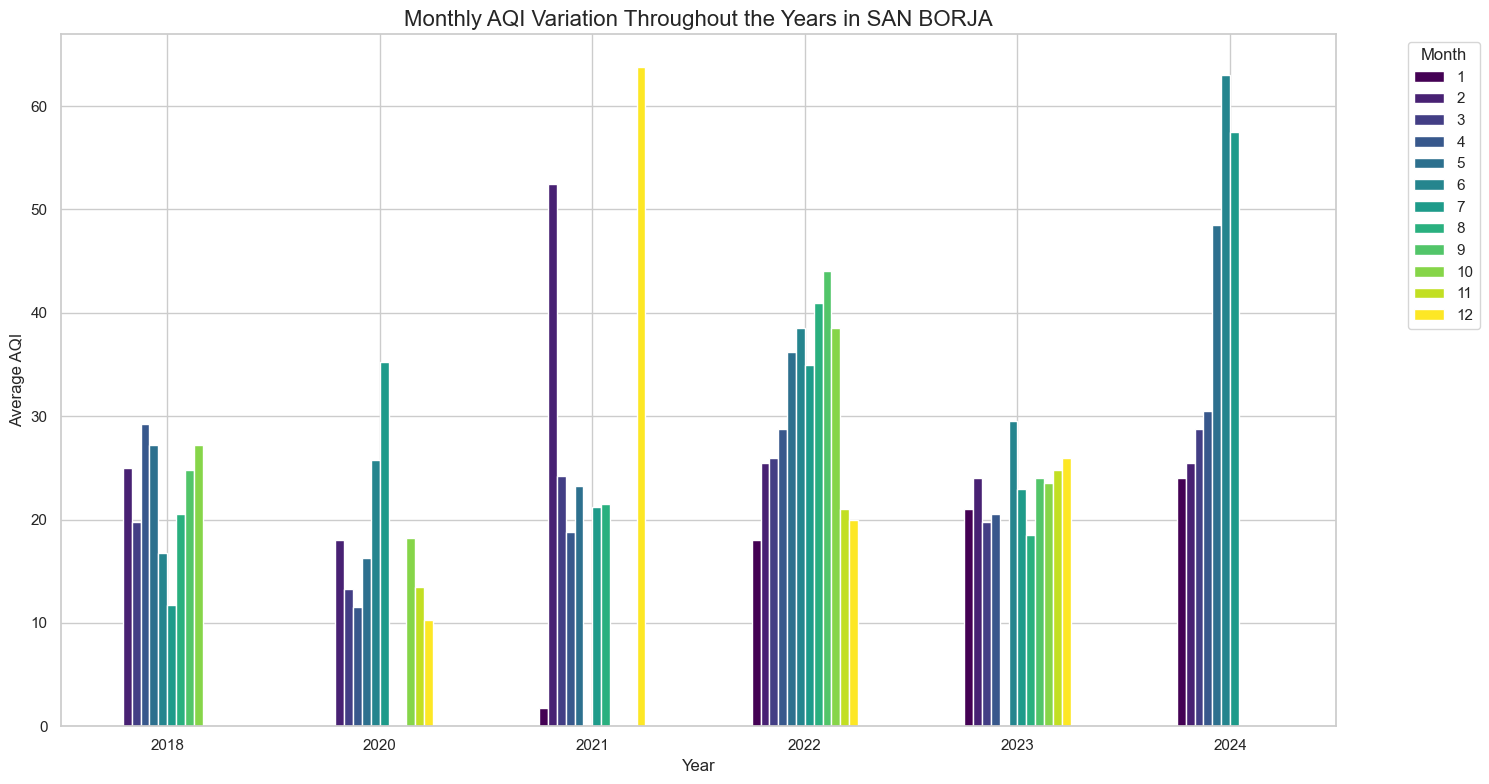

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'date' column is in datetime format
fnew['date'] = pd.to_datetime(fnew['date'])

# Step 1: Calculate the monthly average AQI for each city
fnew['month'] = fnew['date'].dt.strftime('%b')  # Convert to Jan, Feb, etc. format
fnew['year'] = fnew['date'].dt.year

# If 'AQI' is not a direct column, calculate an average AQI from the parameters
if 'AQI' not in fnew.columns:
    fnew['AQI'] = fnew[parameters].mean(axis=1)

# Calculate monthly average AQI for each city
monthly_avg = fnew.groupby(['name', 'year', 'month'])['AQI'].mean().reset_index()

# Convert the 'month' column back to an integer format for proper sorting
fnew['month_num'] = fnew['date'].dt.month

# Step 2: Plot a bar graph for each city showing the monthly variations of AQI throughout the years
for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    monthly_avg_city = city_data.groupby(['year', 'month_num'])['AQI'].mean().reset_index()

    # Pivot the data to get months as columns and years as rows
    monthly_avg_city_pivot = monthly_avg_city.pivot(index='year', columns='month_num', values='AQI')
    monthly_avg_city_pivot = monthly_avg_city_pivot.reindex(columns=range(1, 13))  # Ensure all months are included

    # Plotting the bar graph
    monthly_avg_city_pivot.plot(kind='bar', figsize=(15, 8), colormap='viridis')
    plt.title(f'Monthly AQI Variation Throughout the Years in {city}', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Average AQI')
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [183]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
final_new = pd.read_csv('final_new.csv')

# Filter for specific cities (example: ['City1', 'City2'])
specific_cities = ['42N035 - AARSCHOT']
filtered_df = final_new[final_new['name'].isin(specific_cities)]

# Filter for specific parameters (example: ['no2', 'o3'])
specific_parameters = ['no2']
filtered_df = filtered_df[['name', 'months', 'year', 'date'] + specific_parameters]

# Combine parameters to form an AQI index for simplicity (can be changed as needed)
filtered_df['AQI_index'] = filtered_df[specific_parameters].mean(axis=1)

# Initialize the scaler and fit_transform the pollutants
scaler = MinMaxScaler()
filtered_df[specific_parameters] = scaler.fit_transform(filtered_df[specific_parameters])

# Normalize AQI index
aqi_scaler = MinMaxScaler()
filtered_df['AQI_index'] = aqi_scaler.fit_transform(filtered_df[['AQI_index']])


In [184]:
# Create lag features for the past 12 months
for parameter in specific_parameters + ['AQI_index']:
    for lag in range(1, 13):
        filtered_df[f'{parameter}_lag_{lag}'] = filtered_df[parameter].shift(lag)

# Drop rows with NaN values created by lag features
filtered_df = filtered_df.dropna()


In [185]:
# Features and target variable for AQI index prediction
X = filtered_df[[f'AQI_index_lag_{lag}' for lag in range(1, 13)]]
y = filtered_df['AQI_index']

# Split the data into training and testing sets
train_size = int(len(filtered_df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [186]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict the next month's AQI for specific cities
predictions = {}
for city in specific_cities:
    city_df = filtered_df[filtered_df['name'] == city]
    last_known_values = city_df.iloc[-1][[f'AQI_index_lag_{lag}' for lag in range(1, 13)]].values.reshape(1, -1)
    next_month_normalized_prediction = model.predict(last_known_values)
    next_month_prediction = aqi_scaler.inverse_transform(next_month_normalized_prediction.reshape(-1, 1))
    predictions[city] = next_month_prediction[0][0]

for city, prediction in predictions.items():
    print(f"Predicted AQI for next month in {city}: {prediction}")


Mean Squared Error: 0.014163875723906977
R^2 Score: -0.5472409930693607
Predicted AQI for next month in 42N035 - AARSCHOT: 7.12897806191285


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
